**UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL  
FACULDADE DE CIENCIAS ECONOMICAS  
DEPARTAMENTO DE ECONOMIA E RELACOES INTERNACIONAIS  
DISCIPLINA: ECO02018 - TOPICOS ESPECIAIS EM ECONOMETRIA  
ALUNA: TAINAN DE BACCO FREITAS BOFF**  

# A efetividade das politicas publicas para controle do tabagismo

Utilizando dados da OMS para 88 paises, esse estudo verifica a efetividade de duas politicas publicas para o controle do tabagismo. A primeira delas e a tributacao sobre cigarros e a segunda sao leis que estabelecem a area minima da carteira de cigarros que devera conter avisos sobre os maleficios do tabagismo a saude. Todos os dados foram coletados entre 2013 e 2014.

In [125]:
# Importacao de pacotes
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Inicializacao de variaveis

In [177]:
## Entrada de dados

# Consumo diario de cigarros padronizado pela idade (possibilita comparacao entre paises e ao longo do tempo)
fumantes = pd.read_csv("http://apps.who.int/gho/athena/api/GHO/M_Est_cig_daily.csv?filter=SEX:BTSX", usecols = ['COUNTRY', 'Display Value'], na_values = 'Not available')
fumantes.columns = ['pais', 'fumantes']

# Porcentagem de impostos no preco do cigarro
impostos = pd.read_csv("http://apps.who.int/gho/athena/api/GHO/R_total_tax_average.csv?filter=YEAR:2014", usecols = ['COUNTRY','Display Value'], na_values = 'Not available')
impostos.columns = ['pais', 'impostos']

# Area (%) de um pacote de cigarros que deve conter avisos de saude
avisos = pd.read_csv("http://apps.who.int/gho/athena/api/GHO/W2_pc_front_back_A.csv?filter=YEAR:2014", usecols = ['COUNTRY', 'Display Value'], na_values = 'Not specified')
avisos = avisos.replace(to_replace = "Not applicable", value = '0')
avisos.columns = ['pais', 'avisos']

In [178]:
# Unifica a base de dados
dados_parcial = pd.merge(fumantes, impostos, on = 'pais')
dados = pd.merge(dados_parcial, avisos, on = 'pais')

# Exclui linhas com NaN
dados = dados.dropna()

# Verifica numero de observacoes (paises) na amostra
print('A amostra contem',dados.shape[0],'paises.')

# Converte os dados das colunas 1, 2 e 3 para float
dados[['fumantes','impostos','avisos']] = dados[['fumantes','impostos','avisos']].apply(pd.to_numeric)

# Imprime 5 primeiras observacoes
dados.head()

A amostra contem 88 paises.


,pais,fumantes,impostos,avisos
0,GHA,3.9,28.3,50.0
4,USA,14.3,42.9,50.0
5,LUX,15.8,70.7,39.0
6,NPL,16.9,46.6,90.0
7,MDA,17.9,51.6,35.0


## Analise exploratoria dos dados

In [179]:
# Estatisticas descritivas
dados.describe()

,fumantes,impostos,avisos
count,88.000000,88.000000,88.000000
mean,16.089773,59.520455,42.164773
std,7.100478,19.899230,16.255807
min,2.900000,4.300000,0.000000
25%,11.375000,47.275000,35.000000
50%,16.100000,63.600000,39.000000
75%,21.175000,76.175000,50.000000
max,31.100000,86.000000,90.000000


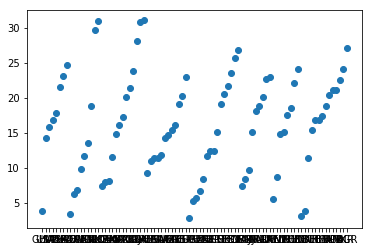

In [159]:
plt_fumantes = plt.scatter(dados.pais, dados.fumantes)
plt.show()

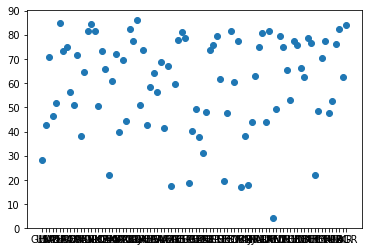

In [157]:
plt_impostos = plt.scatter(dados.pais, dados.impostos)
plt.show()

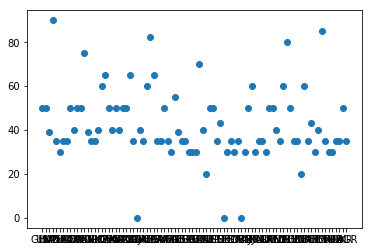

In [156]:
plt_avisos = plt.scatter(dados.pais, dados.avisos)
plt.show()

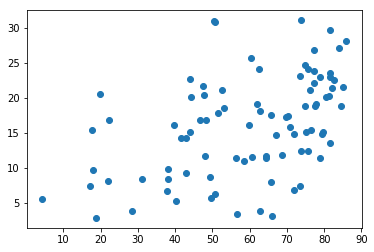

In [161]:
plt_impostos_fumantes = plt.scatter(dados.impostos, dados.fumantes)
plt.show()

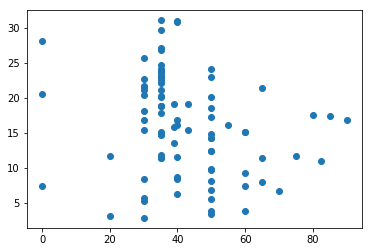

In [162]:
plt_avisos_fumantes = plt.scatter(dados.avisos, dados.fumantes)
plt.show()

In [ ]:
# Processamento dos dados

In [ ]:
# Saida dos dados